<a href="https://colab.research.google.com/github/tintoretor/CIRTS/blob/master/CASHFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Load the CSV file
file_path = "Cash Flow Data - Sheet1.csv"
data = pd.read_csv(file_path, parse_dates=['Date'])

# Display the first few rows of the DataFrame to confirm successful upload
print(data.head())

        Date Department      Amount
0 2019-04-01         D2   44750.085
1 2019-04-01         D4   24094.335
2 2019-04-01         D5  586131.765
3 2019-04-01         D6   91341.735
4 2019-04-01         D7   43500.000


<ipython-input-5-39be33caac3f>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['Date'])


In [6]:
# Reload the CSV file with explicit date parsing
data = pd.read_csv(file_path, parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%d-%b-%y'))

# Check the data types to ensure the 'Date' column is parsed correctly
print(data.dtypes)


Date          datetime64[ns]
Department            object
Amount               float64
dtype: object


<ipython-input-6-c91826522ef6>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(file_path, parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%d-%b-%y'))


In [7]:
# Group by department and aggregate data
department_data = data.groupby(['Department', pd.Grouper(key='Date', freq='M')])['Amount'].sum().reset_index()

# Preview the grouped data
print(department_data.head())


  Department       Date        Amount
0         D1 2019-04-30 -2.898856e+07
1         D1 2019-05-31 -3.608895e+07
2         D1 2019-06-30 -2.629219e+07
3         D1 2019-07-31 -3.780899e+07
4         D1 2019-08-31 -2.968977e+07


<ipython-input-7-edfa643d632c>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  department_data = data.groupby(['Department', pd.Grouper(key='Date', freq='M')])['Amount'].sum().reset_index()


In [8]:
# Pivot the data for better analysis
time_series_data = department_data.pivot(index='Date', columns='Department', values='Amount')

# Preview the reshaped time series data
print(time_series_data.head())


Department            D1           D10            D2  D3            D4  \
Date                                                                     
2019-04-30 -2.898856e+07  4.132275e+09 -2.901245e+07 NaN -3.337354e+08   
2019-05-31 -3.608895e+07  4.060587e+09 -7.449973e+07 NaN -3.919078e+08   
2019-06-30 -2.629219e+07  3.850006e+09 -4.967288e+07 NaN -4.771138e+08   
2019-07-31 -3.780899e+07  4.306217e+09 -3.058598e+06 NaN -3.688437e+08   
2019-08-31 -2.968977e+07  4.048554e+09 -5.477359e+07 NaN -3.537666e+08   

Department            D5            D6            D7            D8  \
Date                                                                 
2019-04-30  6.557770e+07 -5.044075e+08 -2.818601e+08 -1.296326e+07   
2019-05-31  7.906364e+07 -9.292851e+08 -3.036010e+08 -7.441856e+06   
2019-06-30  8.354276e+07 -8.682157e+08 -2.426766e+08 -1.780189e+07   
2019-07-31  5.129511e+07 -3.150832e+08 -2.633470e+08 -1.341064e+07   
2019-08-31  2.257133e+07 -5.308038e+07 -2.464248e+08 -1.41062

In [ ]:
#Forecasting the Cash Flow for a Department (e.g., D1)

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Select one department's time series (e.g., D1)
d1_series = time_series_data['D1'].dropna()

# Fit an ARIMA model (p=1, d=1, q=1 as an example, tune these based on data)
model = ARIMA(d1_series, order=(1, 1, 1))
model_fit = model.fit()

# Predict the next month's cash flow
forecast = model_fit.forecast(steps=1)
print(f"Next month's forecast for D1: {forecast.values[0]:.2f}")


Next month's forecast for D1: -51344546.82


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [10]:
# Ensure the 'Date' index has a frequency explicitly set
d1_series = time_series_data['D1'].dropna()
d1_series.index = d1_series.index.to_period('M')  # Set frequency to monthly

# Fit the ARIMA model again
model = ARIMA(d1_series, order=(1, 1, 1))
model_fit = model.fit()

# Predict the next month's cash flow
forecast = model_fit.forecast(steps=1)
print(f"Next month's forecast for D1: {forecast.values[0]:.2f}")


Next month's forecast for D1: -51344546.82


The output value, -51344546.81, suggests that the ARIMA model predicts a negative cash flow for the next month for department D1. This might indicate a trend of decreasing cash flow or fluctuations in historical data

# Visualize the Time Series: Plot the historical cash flow for department D1 to identify trends, seasonality, or anomalies.

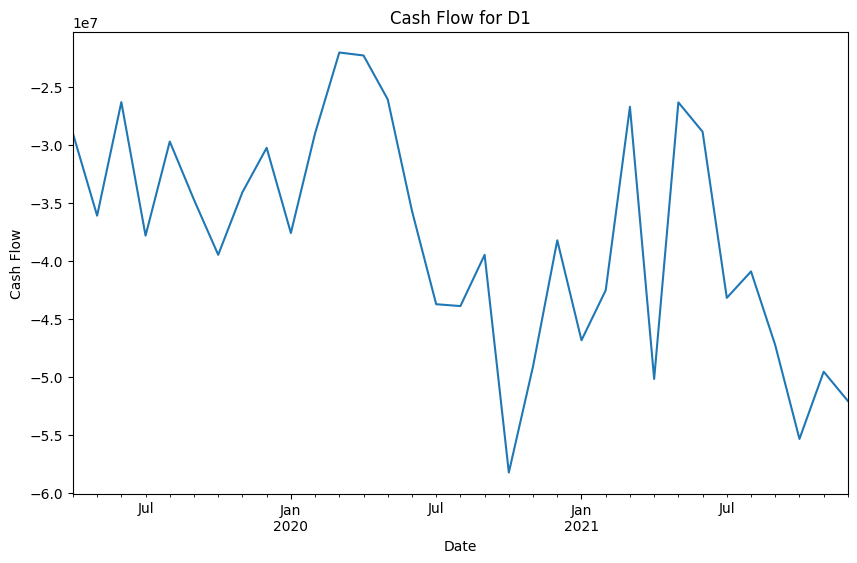

In [11]:
import matplotlib.pyplot as plt

d1_series.plot(title="Cash Flow for D1", figsize=(10, 6))
plt.ylabel("Cash Flow")
plt.show()


# Check Model Diagnostics: Examine the ARIMA model's residuals to ensure the model fits well.

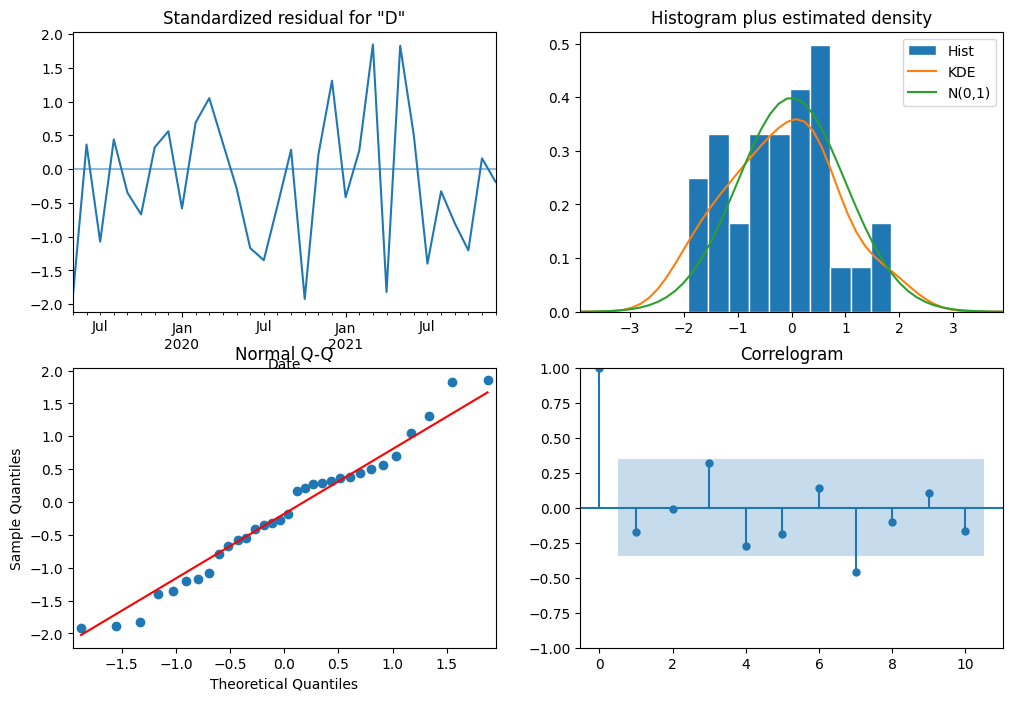

In [12]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()


### The diagnostic plots for your ARIMA model provide important insights into how well the model fits your data.


## Standardized Residuals (Top Left):

This plot shows the residuals over time. Ideally, they should fluctuate randomly around zero, indicating that the model captures the data's structure.
Observation: There seems to be some variation, but it appears fairly random. If patterns exist, the model may need refinement.

## Histogram Plus Estimated Density (Top Right):

This histogram of residuals shows whether they follow a normal distribution. The orange curve is the kernel density estimate (KDE), while the green line is the normal distribution (N(0,1)).
Observation: The residuals appear close to normal but slightly skewed. If the deviations are significant, the model assumptions may be violated.

## Normal Q-Q Plot (Bottom Left):

This plot compares the quantiles of the residuals to a normal distribution. Ideally, the points should fall along the red line.
Observation: The points mostly align with the red line, with minor deviations at the tails. This suggests that residuals are approximately normal.

## Correlogram (Bottom Right):

This plot shows the autocorrelations of residuals. Significant lags (outside the blue confidence intervals) indicate that the model has not captured all the patterns in the data.


### Check for Seasonality: If the data has seasonal patterns, consider using SARIMA instead of ARIMA.

In [15]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Forecasting for all departments
forecasts = {}
for dept in time_series_data.columns:
    # Select the series for the department and drop missing values
    series = time_series_data[dept].dropna()

    # Ensure that the series is a Pandas Series and has a proper DateTimeIndex
    if isinstance(series, pd.Series) and not series.empty:
        # Set the frequency to monthly, assuming the data index is in datetime format
        series.index = pd.to_datetime(series.index)
        series = series.asfreq('M')

        # Fit the ARIMA model (adjust the order as necessary)
        model = ARIMA(series, order=(1, 1, 1))  # You can adjust the order as needed
        model_fit = model.fit()

        # Predict the next month's cash flow
        forecast = model_fit.forecast(steps=1)

        # Store the forecast in the dictionary
        forecasts[dept] = forecast[0]
    else:
        print(f"Skipping department {dept} due to invalid data.")

# Display the forecasts for all departments
print("Next month's forecast for all departments:")
for dept, forecast_value in forecasts.items():
    print(f"{dept}: {forecast_value:.2f}")




<ipython-input-15-fc0bf6dc38dd>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series = series.asfreq('M')
<ipython-input-15-fc0bf6dc38dd>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasts[dept] = forecast[0]
<ipython-input-15-fc0bf6dc38dd>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series = series.asfreq('M')
<ipython-input-15-fc0bf6dc38dd>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasts[dept] = forecast[0]
<ipython-input-15-fc0bf6dc38dd>:14: FutureWarning: 'M' is deprecated a

Next month's forecast for all departments:
D1: -51344546.82
D10: 4624981179.24
D2: -44939982.64
D3: 4806.16
D4: -458688793.86
D5: 13855240.70
D6: -104353294.10
D7: -419620549.57
D8: -8778237.28
D9: 84436975.52


<ipython-input-15-fc0bf6dc38dd>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasts[dept] = forecast[0]


## The warnings and the resulting forecasts indicate that the ARIMA model might not be appropriate for our data, as the model struggles with very few observations or the data's volatility.

In [14]:
pip install prophet


In [16]:
pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [17]:
from prophet import Prophet  # if using 'prophet' package




In [18]:
from fbprophet import Prophet
import pandas as pd

# Create a dictionary to store forecasts
forecasts = {}

# Example time series data for departments (replace with your actual data)
time_series_data = {
    'D1': [1000, 1050, 1100, 1150, 1200],
    'D2': [2000, 1950, 2100, 2200, 2300],
    'D3': [1500, 1550, 1600, 1650, 1700],
    # Add data for other departments as needed
}

# Loop through each department's data
for dept, data in time_series_data.items():
    series = pd.Series(data)

    # Convert to dataframe format expected by Prophet: 'ds' for dates, 'y' for values
    if len(series) > 1:  # Ensure there's more than one data point
        df = pd.DataFrame({'ds': pd.date_range(start='2024-01-01', periods=len(series), freq='M'), 'y': series})

        # Initialize Prophet model
        model = Prophet()

        try:
            # Fit the model
            model.fit(df)

            # Create future dates for prediction
            future = model.make_future_dataframe(df, periods=1, freq='M')

            # Predict the next month's value
            forecast = model.predict(future)

            # Get the forecasted value for the next month
            forecasts[dept] = forecast['yhat'].iloc[-1]
        except Exception as e:
            print(f"Error forecasting for {dept}: {e}")
            forecasts[dept] = None
    else:
        print(f"Skipping department {dept} due to insufficient data.")
        forecasts[dept] = None

# Display the forecast for each department
print("Next month's forecast for all departments:")
for dept, forecast_value in forecasts.items():
    if forecast_value is not None:
        print(f"{dept}: {forecast_value:.2f}")
    else:
        print(f"{dept}: Unable to forecast")



ModuleNotFoundError: No module named 'fbprophet'